# Least squares with polynomial features fit

In [72]:
%matplotlib inline
#%matplotlib notebook
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


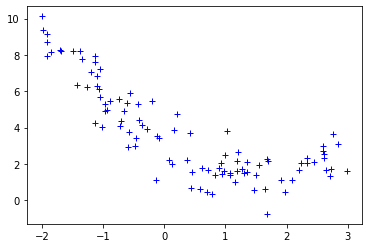

In [174]:
m = 100
x = 5 * np.random.rand(m, 1) - 2
y = 0.7 * x ** 2 - 2 * x + 3 + np.random.randn(m, 1)


plt.plot(x, y, 'b+')
plt.show()

LinearRegression model method <code>**[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)**</code> and <code>**[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)**</code>

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

RMSE: 1.492
R2:   0.650


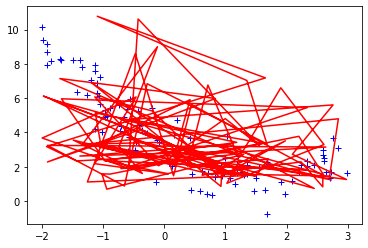

In [184]:
m = LinearRegression()
m.fit(x, y)
y_preds = m.predict(x)

print(
    f'RMSE: {np.sqrt(mean_squared_error(y, y_preds)):.3f}\n' 
    f'R2:   {r2_score(y, y_preds):.3f}'
)

plt.plot(x, y, 'b+')
plt.plot(x, preds, 'r-')
plt.show()

RMSE: 1.492
R2:   0.650


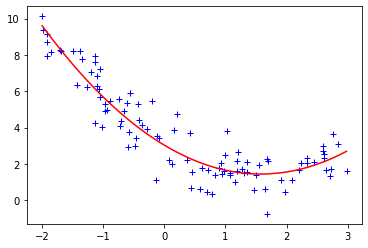

In [185]:
poly_feats = PolynomialFeatures(degree=2)
x_poly = poly_feats.fit_transform(x)

lr = LinearRegression()
lr.fit(x_poly, y)

y_pred = lr.predict(x_poly)

print(
    f'RMSE: {np.sqrt(mean_squared_error(y, y_preds)):.3f}\n' 
    f'R2:   {r2_score(y, y_preds):.3f}'
)

plt.plot(x, y, 'b+')
plt.plot(sorted(x[:, 0]), y_pred[np.argsort(x[:, 0])], 'r')
plt.show()

The performance boost is evident in both the performance metrics – <code>**RMSE**</code> has decreased and <code>**R2**</code> score has increased. The same thing is evident in the plot. Let’s take a few higher degree of polynomial features    2, 4, 8, 16, 32

Degree: 2
RMSE:   0.924
R2:     0.866
-------------
Degree: 4
RMSE:   0.918
R2:     0.868
-------------
Degree: 8
RMSE:   0.908
R2:     0.870
-------------
Degree: 16
RMSE:   0.856
R2:     0.885
-------------
Degree: 32
RMSE:   0.824
R2:     0.893
-------------


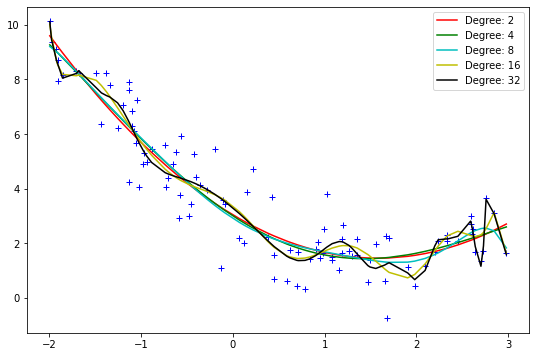

In [186]:
def get_preds(x, y, degree):
    poly_feats = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_feats.fit_transform(x)
    lr = LinearRegression()
    lr.fit(x_poly, y)
    return lr.predict(x_poly)

degrees = [2,   4,   8,   16,   32]
cs      = ['r', 'g', 'c', 'y', 'k']

plt.figure(figsize=(9, 6))
plt.plot(x, y, 'b+',)

for degree, c in zip(degrees, cs):
    y_preds = get_preds(x, y, degree)
    plt.plot(sorted(x[:, 0]), y_preds[np.argsort(x[:, 0])], c, label='Degree: {}'.format(degree))
    print(
    f'Degree: {degree}\n' 
    f'RMSE:   {np.sqrt(mean_squared_error(y, y_preds)):.3f}\n' 
    f'R2:     {r2_score(y, y_preds):.3f}'
    '\n''-------------'
)

plt.legend()
plt.show()

Our model complexity was increased by the degree of polynomial features. We went from a bad model of degree 1, which has high bias <code>**underfits**</code>, to quite good model (degree 2) and then to another bad models (degree 16 or 32), which has high variance <code>**overfits**</code>. Thus we hurt performance and we need to make sure that with increased complexity we stays sane levels of performance, refer to <code>**[Big O notion](https://en.wikipedia.org/wiki/Big_O_notation)**</code><br>

To get good generalization capabilities that perform well on unseen data we will work with learning curves to peek into performance metrics.

We can utilitze <code>**[sklearn pipeline module](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)**</code> for <code>**PolynomialFeatures and LinearRegression**</code> to group them into one single entity and perform in conjunction to each other

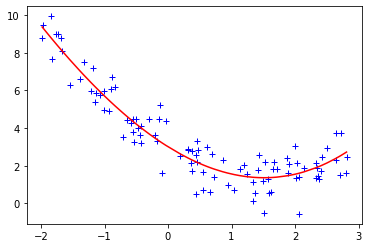

In [203]:
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('lr', LinearRegression())
])

model.fit(x, y)
y_pred = model.predict(x)

plt.plot(x, y, 'b+', )
plt.plot(sorted(x[:, 0]), y_pred[np.argsort(x[:, 0])], 'r')
plt.show()

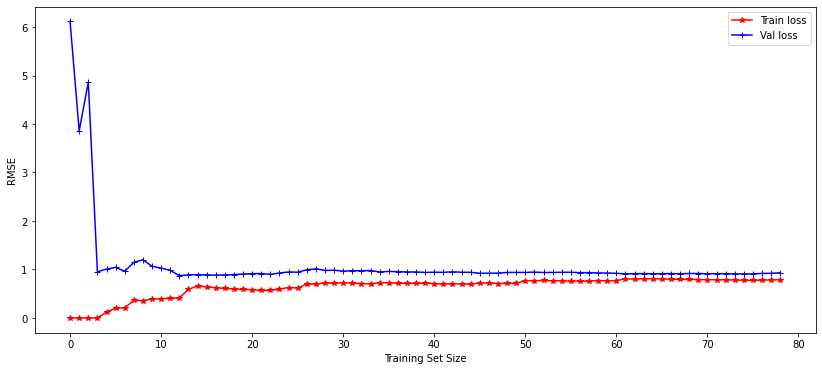

In [204]:
def plot_lcs(model, X, Y, val_split=0.2, metrics=mean_squared_error):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
    
    # collections of errors:
    train_time_loss, val_time_loss = [], []
    # iterating over train size:
    for train_size in range(1, len(x_train)):
        # training
        model.fit(x_train[:train_size], y_train[:train_size])
        # train and val predictions
        train_preds = model.predict(x_train[:train_size])
        val_preds = model.predict(x_val)
        # metrics calculation
        train_time_loss.append(metrics(y_train[:train_size], train_preds))
        val_time_loss.append(metrics(y_val, val_preds))
    # plotting curves
    plt.plot(np.sqrt(train_time_loss), 'r-*', label='Train loss')
    plt.plot(np.sqrt(val_time_loss), 'b-+', label='Val loss')
    plt.ylabel('RMSE')
    plt.xlabel('Training Set Size')

plt.figure(figsize=(14, 6))
plot_lcs(model, x, y)
plt.legend()
plt.show()

Gap between <code>**validation loss**</code> curve and the <code>**training loss**</code> curve has increased

<IPython.core.display.Javascript object>


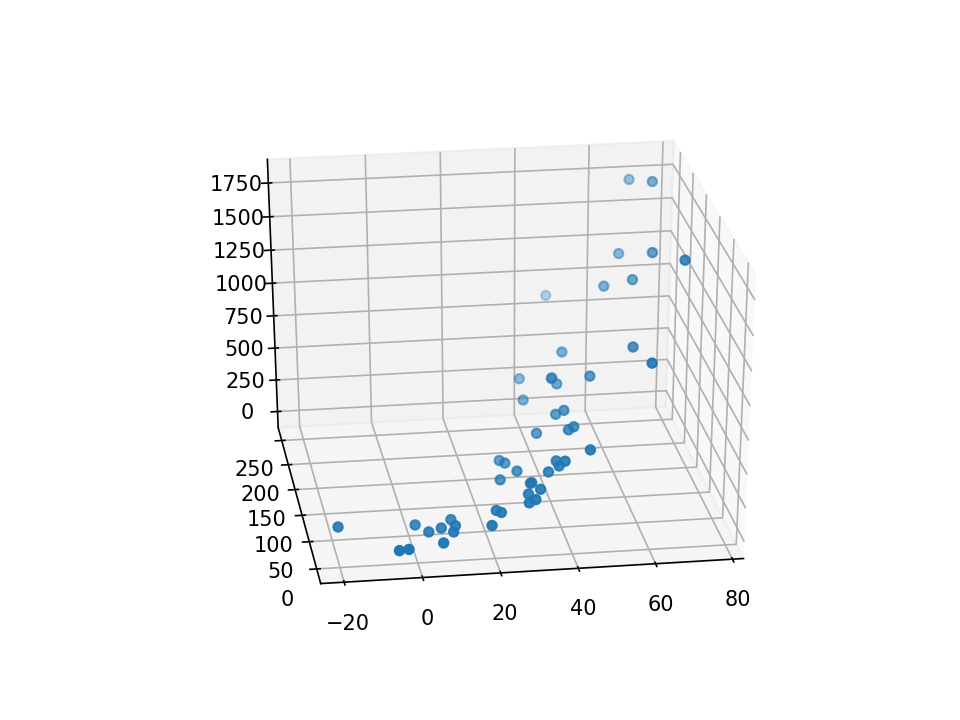

In [25]:
X = [[15 * np.random.normal(x/12) for x in range(2,52)], [15 * np.random.normal(2**(x/12) )for x in range(0,50)]]
 
def y_of_x(xa):
    variation = random.uniform(-(xa[0] + xa[1])/4,(xa[0] + xa[1])/4)
    return 0.2*xa[0]**2 + 0.03*xa[0]*xa[1] + 0.7*xa[0] + 0.002*xa[1]**2 \
        + 0.04*xa[1] + 2.0 + variation
Y = []
for xa in np.transpose(X):
    Y.append(y_of_x(xa))
 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[0], X[1], Y)